<a href="https://colab.research.google.com/github/Vankum100/colabs/blob/data-visual-with-python-course/Lokta_Volterra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LAB 5 using Python

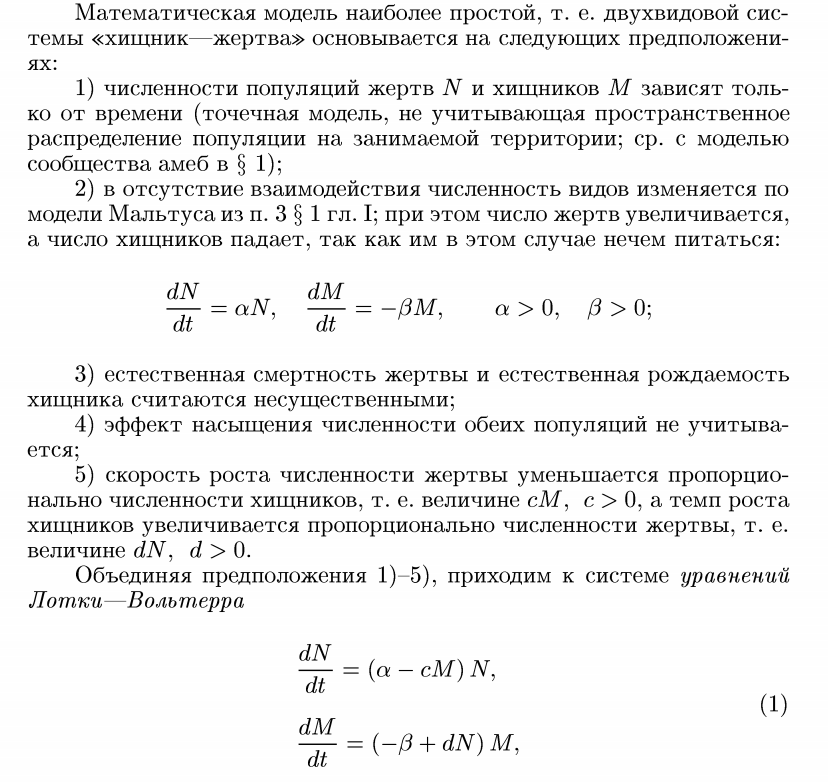

# Презентация модели Лотки-Вольтерры

du/dt = au - buv
dv/dt = -cv + dbu*v

со следующими обозначениями:

u: количество жертв (например, кролики)

v: количество хищников (например, лисиц)

a, b, c, d - постоянные параметры, определяющие поведение популяции:

a -- естественная скорость роста кроликов, когда нет лисы

b -- естественная скорость смерти кроликов из-за хищничества

c -- естественная скорость смерти лисы, когда нет кролика

d -- фактор, описывающий, сколько пойманных кроликов позволяют создать новую лису

# состояние равновесия

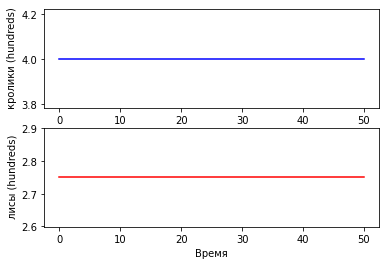

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint




t = np.linspace(0,50,num=1000)

a = 1.1
b= 0.4
c = 0.1
d = 0.4

# steady state initial conditions
y0 = [d/c , a/b] # [rabbits, foxes] units in hundreds


params = [a, b, c, d]

def sim(variables, t, params):

    # rabbit population level
    x = variables[0]

    # fox  population level
    y = variables[1]


    a = params[0]
    b = params[1]
    c = params[2]
    d = params[3]

    dxdt = a * x - b * x * y
    dydt = c * x * y - d * y

    return([dxdt, dydt])


y = odeint(sim, y0, t, args=(params,))


f,(ax1,ax2) = plt.subplots(2)

line1, = ax1.plot(t,y[:,0], color="b")



line2, = ax2.plot(t,y[:,1], color="r")

ax1.set_ylabel(" кролики (hundreds)")
ax2.set_ylabel(" лисы (hundreds)")
ax2.set_xlabel("Время")

plt.show()

# Эволюция популяций лисиц и кроликов

In [2]:

from numpy import *
import pylab as p
# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])
    

In [4]:

from scipy import integrate
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

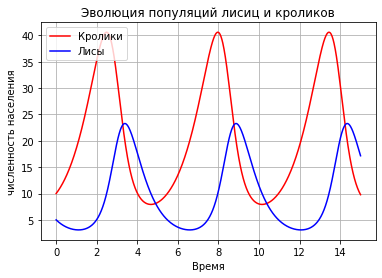

In [6]:
#!python
rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Кролики')
p.plot(t, foxes  , 'b-', label='Лисы')
p.grid()
p.legend(loc='best')
p.xlabel('Время')
p.ylabel('численность населения')
p.title('Эволюция популяций лисиц и кроликов');
#f1.savefig('rabbits_and_foxes_1.png')

# Построение полей направлений и траекторий на фазовой плоскости

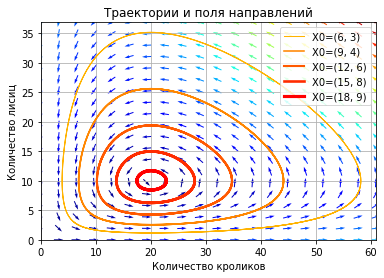

In [8]:
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])

values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Траектории и поля направлений')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Количество кроликов')
p.ylabel('Количество лисиц')
p.legend()
p.grid()
p.xlim(0, xmax);
p.ylim(0, ymax);
#f2.savefig('rabbits_and_foxes_2.png')

**объяснение графика**

Этот график показывает нам, что изменение популяции лисиц или кроликов может иметь неинтуитивный эффект. Если, чтобы уменьшить поголовье кроликов, мы введем лисиц, это может привести к увеличению поголовья кроликов в долгосрочной перспективе, в зависимости от времени вмешательства.

# Вывод:

В данной лабораторной работе мы исследовали
взаимоотношения двух популяций. Мы
выяснили, что рассматриваемые модели адекватно
описывают взаимодействие
«хищников» и «жертв», если учесть введённые
упрощающие предположения. В реальной
ситуации взаимодействие популяций будет гораздо
более сложным.